In [12]:
!pip install sqlalchemy

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 3.1 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 3.5 MB/s eta 0:00:00

   -------------------------- ------------- 2/3 [sqlalchemy]
   -------------------------- ------------- 2/3 [sqlalchemy]
   -------------------------- ------------- 2/3 [sqlalchemy]
   -------------------------- ------------- 2/3 [sqlalchemy]
   -------------------------- ------------- 2/3 [sqlalchemy]
   -------------------------- ------------- 2/3 [sqlalchemy]
   -------------------------- ------------- 2/3 [sqlalchemy]
   -------------------------- ------------- 2/3 [sqlalchemy]
   -------------------------- ------------- 2/3 [sqlalchemy]
   ---------------------------------------- 3/3 [sqlalchemy]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",       # or your MySQL server IP
    user="root",            # your username
    password="admin@123",# your password
    database="jotstar_db"      # your database name
)

cursor = conn.cursor()

# Run a query
cursor.execute("SELECT * FROM contents")

content = []
for row in cursor.fetchall():
    content.append(row)

cursor.execute("SELECT * FROM subscribers")

subscribers = []
for row in cursor.fetchall():
    subscribers.append(row)

cursor.execute("SELECT * FROM content_consumption")

content_consumption = []
for row in cursor.fetchall():
    content_consumption.append(row)

# SELECT * FROM liocinema_db.content_consumption;
content_consumption_df = pd.DataFrame(data = content_consumption, columns = ['user_id', 'device_type', 'total_watch_time_mins'])
content_df = pd.DataFrame(data = content, columns= ['content_id',"content_type", 'language', 'genre', 'runtime' ])
subscribers_df = pd.DataFrame(data = subscribers, columns= ['user_id', 'age_group', 'city_tier', 'subscription_date', 'subscription_plan', 'last_active_date', 'plan_change_date', 'new_subscription_plan' ])
# Close connection
cursor.close()
conn.close()

In [3]:
from sqlalchemy import create_engine
import pandas as pd

  # or content_df, etc.

# Define your MySQL connection details
user = "root"
password = "admin%40123"
host = "localhost"
port = 3306
database = "jotstar_db"

# Construct connection string
db_uri = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"

# Create engine
engine = create_engine(db_uri)

content_consumption_df.to_sql(
    name="content_consumption",
    con=engine,
    if_exists="replace",
    index=False
)

C:\Users\MAHESH KUMAR\AppData\Local\Temp\ipykernel_22244\2029014332.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  content_consumption_df.to_sql(


AttributeError: 'Engine' object has no attribute 'cursor'

In [4]:
subscribers

[('UIDJS0000751588f',
  '18-24',
  'Tier 1',
  datetime.date(2024, 6, 10),
  'Premium',
  None,
  None,
  None),
 ('UIDJS000093eeb86',
  '18-24',
  'Tier 1',
  datetime.date(2024, 11, 9),
  'Free',
  None,
  None,
  None),
 ('UIDJS00010d7fa1e',
  '25-34',
  'Tier 1',
  datetime.date(2024, 8, 8),
  'Free',
  None,
  None,
  None),
 ('UIDJS00013411a85',
  '35-44',
  'Tier 2',
  datetime.date(2024, 5, 31),
  'VIP',
  None,
  None,
  None),
 ('UIDJS0003a3f54cf',
  '35-44',
  'Tier 1',
  datetime.date(2024, 9, 20),
  'Premium',
  None,
  None,
  None),
 ('UIDJS0003c1e814d',
  '45+',
  'Tier 1',
  datetime.date(2024, 9, 29),
  'Free',
  None,
  None,
  None),
 ('UIDJS0005148a254',
  '18-24',
  'Tier 1',
  datetime.date(2024, 11, 10),
  'Premium',
  None,
  None,
  None),
 ('UIDJS00053f36fed',
  '25-34',
  'Tier 1',
  datetime.date(2024, 3, 7),
  'Premium',
  None,
  None,
  None),
 ('UIDJS00054eb2210',
  '25-34',
  'Tier 3',
  datetime.date(2024, 4, 12),
  'Premium',
  None,
  None,
  None),

In [5]:
content_consumption_df.to_sql()

TypeError: NDFrame.to_sql() missing 2 required positional arguments: 'name' and 'con'

In [6]:
content_consumption_df

,user_id,device_type,total_watch_time_mins
0,UIDJS877cc0e02c9,Mobile,14613
1,UIDJS06384e7ff06,Mobile,13271
2,UIDJSc3997b7beb7,Mobile,4644
3,UIDJS66726ce2325,Mobile,5734
4,UIDJS040119b6107,Mobile,2939
...,...,...,...
133855,UIDJS96f8e4a1b54,Laptop,11671
133856,UIDJSa131c0a6199,Laptop,9453
133857,UIDJS3f8a556df56,Laptop,199
133858,UIDJS7a51d1c2bcd,Laptop,3252


In [7]:
import seaborn as sns

content_consumption_avg = content_consumption_df.groupby('device_type').mean('total_watch_time_mins')
content_consumption_avg = content_consumption_avg.reset_index()
content_consumption_avg

,device_type,total_watch_time_mins
0,Laptop,4857.260399
1,Mobile,10563.645316
2,TV,5682.622277


<Axes: xlabel='device_type', ylabel='total_watch_time_mins'>

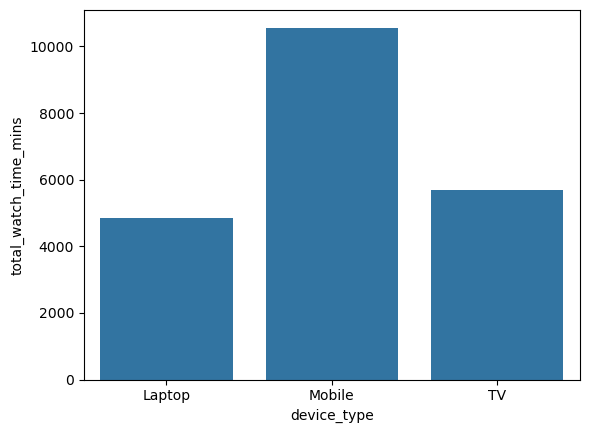

In [8]:
sns.barplot(data=content_consumption_avg, x = 'device_type', y='total_watch_time_mins')

In [9]:
content_df

,content_id,content_type,language,genre,runtime
0,CJSMBEACT2e633,Movie,Bengali,Action,90
1,CJSMBEACT34aec,Movie,Bengali,Action,135
2,CJSMBEACT83b46,Movie,Bengali,Action,120
3,CJSMBECOM12e7a,Movie,Bengali,Comedy,120
4,CJSMBECOM5431a,Movie,Bengali,Comedy,135
...,...,...,...,...,...
2355,CJSSTETHR767c0,Series,Telugu,Thriller,20
2356,CJSSTETHR8b80e,Series,Telugu,Thriller,30
2357,CJSSTETHR92817,Series,Telugu,Thriller,45
2358,CJSSTETHRccd4d,Series,Telugu,Thriller,30


In [10]:
subscribers_df


,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,None,None,None
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,None,None,None
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,None,None,None
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,None,None,None
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,None,None,None
...,...,...,...,...,...,...,...,...
44615,UIDJSfffbb38249e,25-34,Tier 2,2024-11-12,Free,None,None,None
44616,UIDJSfffbd759005,45+,Tier 1,2024-05-21,VIP,None,None,None
44617,UIDJSfffebd3002b,25-34,Tier 1,2024-09-27,VIP,2024-10-29,None,None
44618,UIDJSffff6698084,35-44,Tier 3,2024-10-12,VIP,None,None,None


### Content Library Analysis: A detailed comparison of content types across both platforms.

* IN both the platforms we observed that customers are having more 
watchtime on Mobile device then Tv where as laptop has least watchtime

In [11]:
subscribers_df.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,None,None,None
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,None,None,None
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,None,None,None
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,None,None,None
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,None,None,None


In [12]:
# Subscriber Insights: Analyse trends in subscriber acquisition and demographic variations.

subscribers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44620 entries, 0 to 44619
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                44620 non-null  object
 1   age_group              44620 non-null  object
 2   city_tier              44620 non-null  object
 3   subscription_date      44620 non-null  object
 4   subscription_plan      44620 non-null  object
 5   last_active_date       6652 non-null   object
 6   plan_change_date       7090 non-null   object
 7   new_subscription_plan  7090 non-null   object
dtypes: object(8)
memory usage: 2.7+ MB


In [13]:
subscribers_df['subscription_date'] = pd.to_datetime(subscribers_df['subscription_date'])
subscribers_df['last_active_date'] = pd.to_datetime(subscribers_df['last_active_date'])
subscribers_df['plan_change_date'] = pd.to_datetime(subscribers_df['plan_change_date'])

In [14]:
subscribers_df.dtypes


user_id                          object
age_group                        object
city_tier                        object
subscription_date        datetime64[ns]
subscription_plan                object
last_active_date         datetime64[ns]
plan_change_date         datetime64[ns]
new_subscription_plan            object
dtype: object

In [15]:
sub_plan_vs_age = subscribers_df.groupby('age_group').value_counts(['subscription_plan']).to_frame().reset_index()

In [16]:
sub_plan_vs_age

,age_group,subscription_plan,count
0,18-24,VIP,3252
1,18-24,Premium,2305
2,18-24,Free,2119
3,25-34,VIP,8673
4,25-34,Premium,5938
5,25-34,Free,5458
6,35-44,VIP,4846
7,35-44,Premium,3417
8,35-44,Free,3011
9,45+,VIP,2386


<Axes: xlabel='age_group', ylabel='count'>

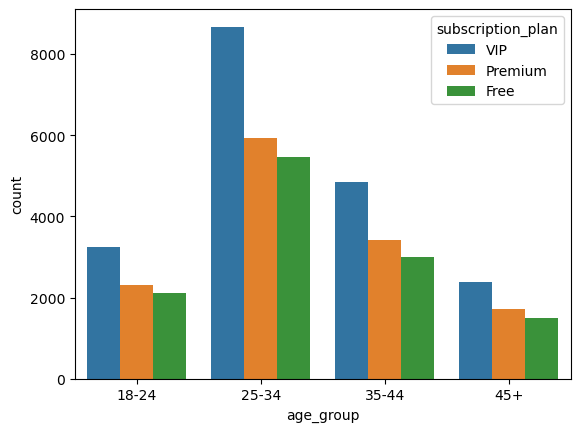

In [17]:
sns.barplot(data = sub_plan_vs_age, x = 'age_group',y='count',hue = 'subscription_plan')

In [18]:
subscribers_df.head(2)

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,None
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,None


In [19]:
subscription_data = subscribers_df.groupby(['subscription_date'])['user_id'].count().to_frame().reset_index()
subscription_data

,subscription_date,user_id
0,2024-01-01,116
1,2024-01-02,137
2,2024-01-03,133
3,2024-01-04,135
4,2024-01-05,126
...,...,...
330,2024-11-26,145
331,2024-11-27,134
332,2024-11-28,138
333,2024-11-29,156


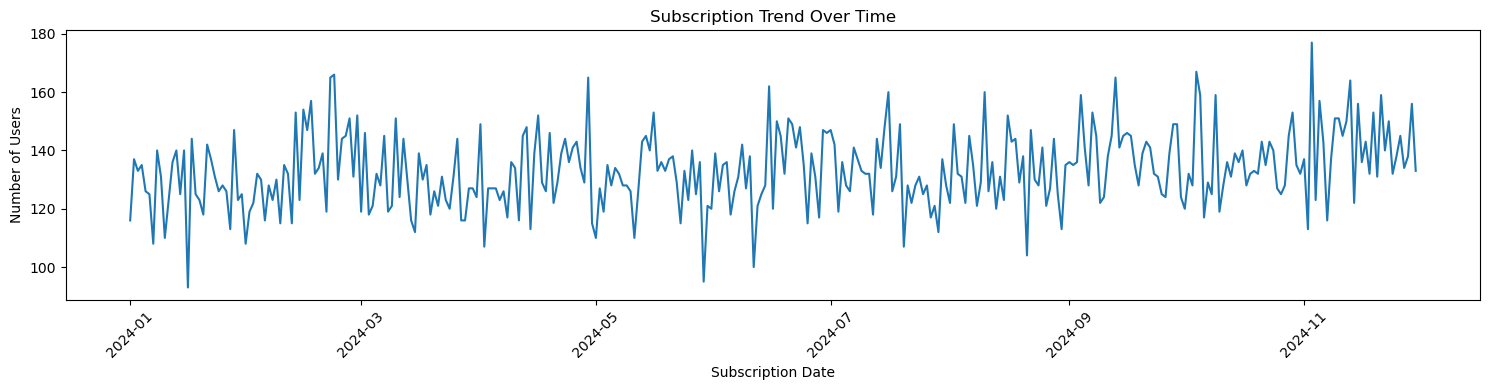

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 4)) 
sns.lineplot(data=subscription_data, x='subscription_date', y ='user_id', markers='*')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
plan_changed_cus = subscribers_df[['user_id','plan_change_date','subscription_plan','new_subscription_plan']].dropna()

In [36]:
plan_changed_cus.head(10)

,user_id,plan_change_date,subscription_plan,new_subscription_plan
12,UIDJS000cd6a7fe8,2024-12-18,Premium,VIP
19,UIDJS0019b04b32f,2024-08-11,VIP,Free
23,UIDJS001defd7e03,2024-08-18,VIP,Free
47,UIDJS003cb5a2cd7,2024-10-05,VIP,Free
58,UIDJS004c0eb4154,2024-09-26,VIP,Free
59,UIDJS004d1ca89e3,2024-08-31,VIP,Free
74,UIDJS005f238dbb0,2024-08-03,Premium,Free
76,UIDJS006315e24bf,2024-03-04,Free,Premium
77,UIDJS0063b1fe9a3,2024-07-25,VIP,Free
81,UIDJS006711c9331,2024-06-22,Free,VIP


In [40]:
rank = {"Free": 1, "Premium": 2, "VIP": 3}

def cus_plan_change(old_plan, new_plan):

    if rank[new_plan] > rank[old_plan]:
        return "Upgrade"
    elif rank[new_plan] < rank[old_plan]:
        return "Downgrade"
    else:
        return "No Change"

plan_changed_cus['cus_plan_changed'] = plan_changed_cus.apply(lambda rows: cus_plan_change(rows['subscription_plan'], rows['new_subscription_plan']), axis=1)


In [37]:
plan_changed_cus['subscription_plan'].unique()

array(['Premium', 'VIP', 'Free'], dtype=object)

In [41]:
plan_changed_cus

,user_id,plan_change_date,subscription_plan,new_subscription_plan,cus_plan_changed
12,UIDJS000cd6a7fe8,2024-12-18,Premium,VIP,Upgrade
19,UIDJS0019b04b32f,2024-08-11,VIP,Free,Downgrade
23,UIDJS001defd7e03,2024-08-18,VIP,Free,Downgrade
47,UIDJS003cb5a2cd7,2024-10-05,VIP,Free,Downgrade
58,UIDJS004c0eb4154,2024-09-26,VIP,Free,Downgrade
...,...,...,...,...,...
44598,UIDJSffd997ae360,2024-08-28,VIP,Free,Downgrade
44600,UIDJSffdbd91a9cb,2024-08-11,VIP,Premium,Downgrade
44601,UIDJSffdd37f5584,2024-08-04,Premium,VIP,Upgrade
44602,UIDJSffe11ff87fb,2024-05-16,VIP,Free,Downgrade


In [46]:
plan_changed_cus_grp = plan_changed_cus.groupby('plan_change_date').value_counts(['cus_plan_changed']).to_frame().reset_index()

In [55]:
plan_changed_cus_grp.head()

,plan_change_date,cus_plan_changed,count
0,2024-02-01,Downgrade,7
1,2024-02-02,Downgrade,7
2,2024-02-02,Upgrade,3
3,2024-02-03,Upgrade,6
4,2024-02-03,Downgrade,5


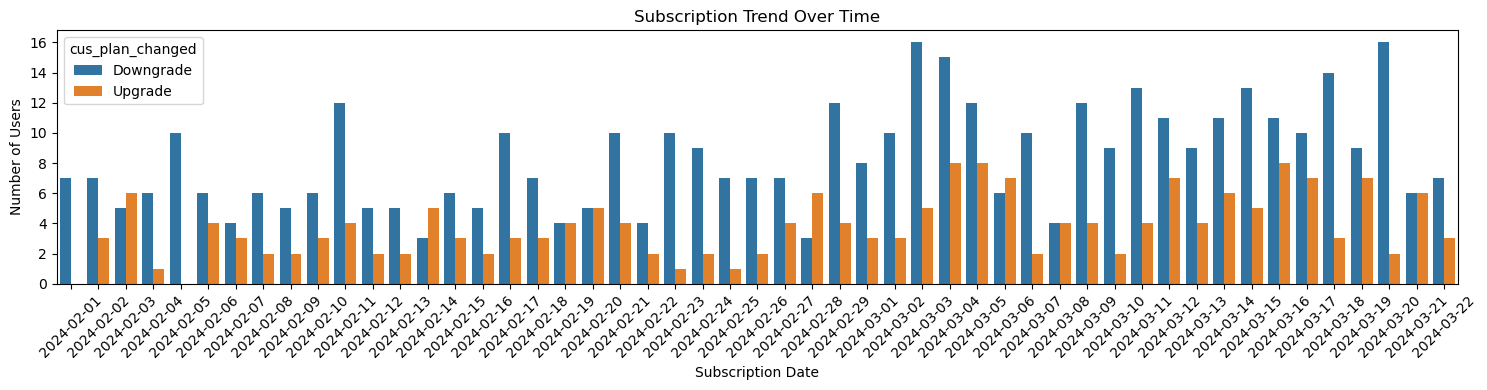

In [53]:

fig, ax = plt.subplots(figsize=(15, 4)) 
sns.barplot(data=plan_changed_cus_grp.head(100), x='plan_change_date', y='count', hue='cus_plan_changed')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
# Instead of looking into day wise --> quarter wise or monthly wise

plan_changed_cus_grp["plan_change_month"] = plan_changed_cus_grp['plan_change_date'].dt.strftime(date_format="%Y-%m")

In [71]:
plan_changed_cus_mnt_df = plan_changed_cus_grp.groupby(['plan_change_month','cus_plan_changed'])['count'].sum().to_frame().reset_index()

In [72]:
plan_changed_cus_mnt_df

,plan_change_month,cus_plan_changed,count
0,2024-02,Downgrade,193
1,2024-02,Upgrade,83
2,2024-03,Downgrade,322
3,2024-03,Upgrade,149
4,2024-04,Downgrade,380
5,2024-04,Upgrade,157
6,2024-05,Downgrade,416
7,2024-05,Upgrade,180
8,2024-06,Downgrade,437
9,2024-06,Upgrade,178


5. Downgrade Patterns: Analysis of subscription downgrades and associated trends.

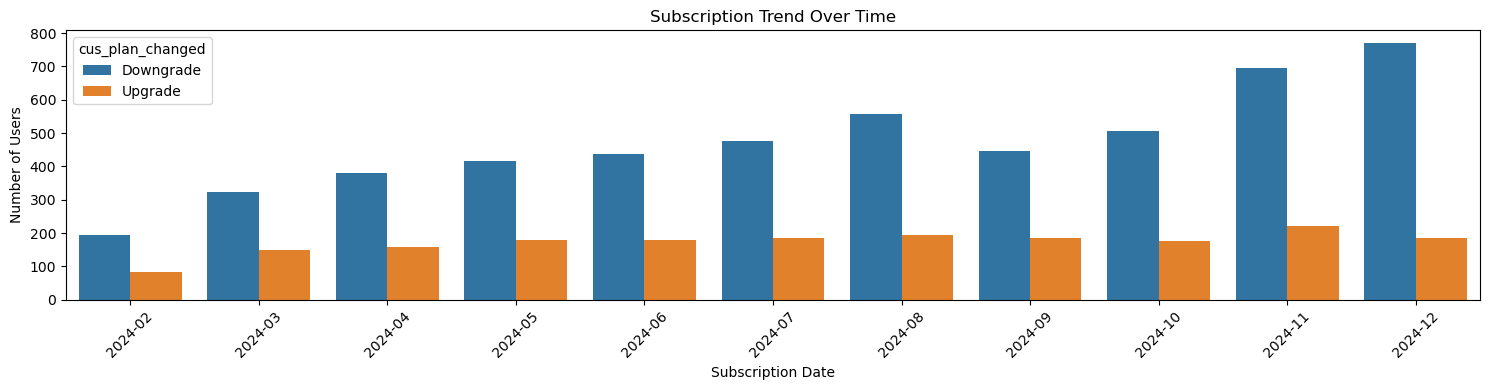

In [73]:
fig, ax = plt.subplots(figsize=(15, 4)) 
sns.barplot(data=plan_changed_cus_mnt_df, x='plan_change_month', y='count', hue='cus_plan_changed')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Assignment :
1) Content Consumption Behavior: Patterns in total watch time, device preferences, and variations by user demographics.
2) what cause downgrade
    -Hint: combine content_consumption_df and subscribers_df


In [ ]:
subscribers_df.head()

3. Inactivity Analysis: Patterns of inactivity across age groups, city tiers, and subscription plans.

In [87]:
subscribers_df.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,customer_activity
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,None,inactive
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,None,inactive
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaT,None,inactive
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaT,None,inactive
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaT,None,inactive


In [79]:
subscribers_df['customer_activity'] = subscribers_df['last_active_date'].fillna("inactive")

In [93]:
subscribers_df['last_active_date'].value_counts()
subscribers_df['last_active_date'].max()

Timestamp('2024-12-29 00:00:00')

In [99]:
threshold_date = subscribers_df['last_active_date'].max() - pd.Timedelta(days=60)
threshold_date

Timestamp('2024-10-30 00:00:00')

In [ ]:
# checking wheather the customer is inactive from past 60 days.

subscribers_df["is_inactive"] = subscribers_df["last_active_date"].isna() | (subscribers_df["last_active_date"] < threshold_date)

<Axes: ylabel='age_group,is_inactive'>

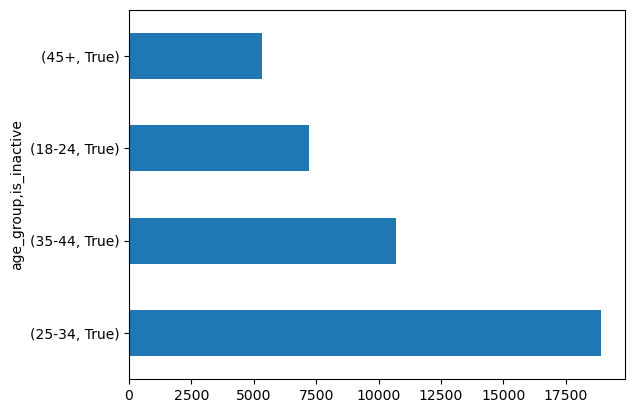

In [108]:
subscribers_df[subscribers_df['is_inactive'] == True][['age_group','is_inactive']].value_counts().plot(kind='barh')

<Axes: ylabel='age_group,city_tier'>

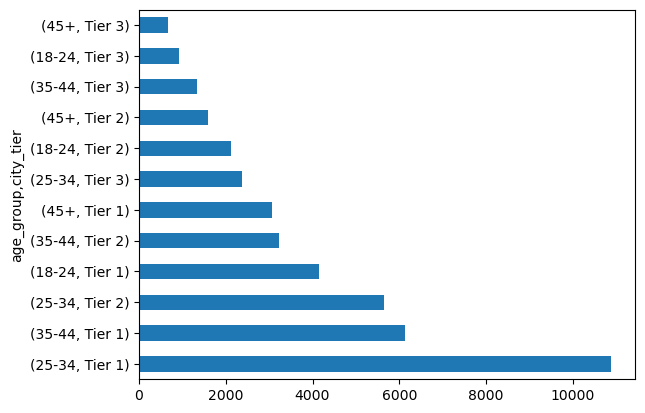

In [ ]:
subscribers_df[subscribers_df['is_inactive'] == True][['age_group','city_tier']].value_counts().plot(kind='barh')

<Axes: xlabel='subscription_plan'>

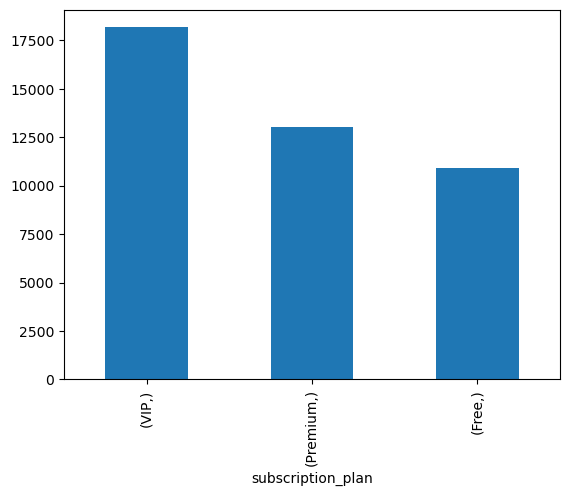

In [111]:
subscribers_df[subscribers_df['is_inactive'] == True][['subscription_plan']].value_counts().plot(kind='bar')

In [21]:
import pandas as pd

In [23]:
# blinkit_ord_df = pd.read_csv(r"E:\Python\Data analysis project\Raw_data\blinkit_orders.csv")
# blinkit_cus_fb_df = pd.read_csv(r"E:\Python\Data analysis project\Raw_data\blinkit_customer_feedback.csv")


In [ ]:
blinkit_ord_df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [ ]:
blinkit_cus_fb_df.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


In [ ]:
blinkit_cus_fb_df.columns

Index(['feedback_id', 'order_id', 'customer_id', 'rating', 'feedback_text',
       'feedback_category', 'sentiment', 'feedback_date'],
      dtype='object')

In [17]:
blinkit_ord_df.columns

Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id'],
      dtype='object')

In [32]:
blinkit_ord_df.join(blinkit_cus_fb_df, on=['order_id','customer_id'], how='outer', rsuffix=['order_id','customer_id'])

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [21]:
blinkit_ord_df.shape

(5000, 10)

In [22]:
blinkit_cus_fb_df.shape

(5000, 8)

In [36]:
final_df = pd.merge(left=blinkit_cus_fb_df,right=blinkit_ord_df,on=['order_id','customer_id'],how='inner')

In [37]:
final_df.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   feedback_id             5000 non-null   int64  
 1   order_id                5000 non-null   int64  
 2   customer_id             5000 non-null   int64  
 3   rating                  5000 non-null   int64  
 4   feedback_text           5000 non-null   object 
 5   feedback_category       5000 non-null   object 
 6   sentiment               5000 non-null   object 
 7   feedback_date           5000 non-null   object 
 8   order_date              5000 non-null   object 
 9   promised_delivery_time  5000 non-null   object 
 10  actual_delivery_time    5000 non-null   object 
 11  delivery_status         5000 non-null   object 
 12  order_total             5000 non-null   float64
 13  payment_method          5000 non-null   object 
 14  delivery_partner_id     5000 non-null   

In [40]:
final_df['feedback_date'] = pd.to_datetime(final_df['feedback_date'])

In [44]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'])
final_df['promised_delivery_time'] = pd.to_datetime(final_df['promised_delivery_time'])  
final_df['actual_delivery_time'] = pd.to_datetime(final_df['actual_delivery_time'])  

In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   feedback_id             5000 non-null   int64         
 1   order_id                5000 non-null   int64         
 2   customer_id             5000 non-null   int64         
 3   rating                  5000 non-null   int64         
 4   feedback_text           5000 non-null   object        
 5   feedback_category       5000 non-null   object        
 6   sentiment               5000 non-null   object        
 7   feedback_date           5000 non-null   datetime64[ns]
 8   order_date              5000 non-null   datetime64[ns]
 9   promised_delivery_time  5000 non-null   datetime64[ns]
 10  actual_delivery_time    5000 non-null   datetime64[ns]
 11  delivery_status         5000 non-null   object        
 12  order_total             5000 non-null   float64 

In [46]:
final_df.describe()

,feedback_id,order_id,customer_id,rating,feedback_date,order_date,promised_delivery_time,actual_delivery_time,order_total,delivery_partner_id,store_id
count,5.000000e+03,5.000000e+03,5.000000e+03,5000.00000,5000,5000,5000,5000,5000.00000,5000.000000,5000.000000
mean,5.013616e+06,5.029129e+09,5.009685e+07,3.34440,2024-01-08 12:53:16.800000,2024-01-09 00:36:06.259200,2024-01-09 00:51:05.743200256,2024-01-09 00:55:32.323200,2201.86170,50050.318200,4999.689000
min,9.470000e+02,6.046500e+04,3.181300e+04,1.00000,2023-03-16 00:00:00,2023-03-16 08:10:44,2023-03-16 08:27:44,2023-03-16 08:24:44,13.25000,43.000000,1.000000
25%,2.576690e+06,2.531421e+09,2.404314e+07,3.00000,2023-08-16 18:00:00,2023-08-17 01:54:09.249999872,2023-08-17 02:13:24.249999872,2023-08-17 02:27:24.249999872,1086.21500,24928.500000,2509.250000
50%,5.005833e+06,5.074378e+09,4.997808e+07,4.00000,2024-01-07 00:00:00,2024-01-07 11:35:32,2024-01-07 11:47:02,2024-01-07 11:51:02,2100.69000,50262.500000,4987.000000
75%,7.486478e+06,7.488579e+09,7.621215e+07,4.00000,2024-06-03 00:00:00,2024-06-03 20:53:15.750000128,2024-06-03 21:09:30.750000128,2024-06-03 21:09:30.750000128,3156.88250,74478.250000,7500.750000
max,9.999293e+06,9.998298e+09,9.989390e+07,5.00000,2024-11-04 00:00:00,2024-11-04 20:29:15,2024-11-04 20:43:15,2024-11-04 20:47:15,6721.46000,99968.000000,9995.000000
std,2.857341e+06,2.863533e+09,2.919082e+07,1.18982,NaN,NaN,NaN,NaN,1303.02438,28802.276922,2886.089242


In [51]:
final_df.describe(include='O')

,feedback_text,feedback_category,sentiment,delivery_status,payment_method
count,5000,5000,5000,5000,5000
unique,25,4,3,3,4
top,The product met my expectations.,Delivery,Neutral,On Time,Card
freq,386,1271,1738,3470,1285


In [53]:
numerical_df = final_df.select_dtypes(exclude='O')
categorical_df = final_df.select_dtypes(include='O')

In [54]:
import seaborn as sns

In [55]:
numerical_df.columns

Index(['feedback_id', 'order_id', 'customer_id', 'rating', 'feedback_date',
       'order_date', 'promised_delivery_time', 'actual_delivery_time',
       'order_total', 'delivery_partner_id', 'store_id'],
      dtype='object')

<Axes: xlabel='rating'>

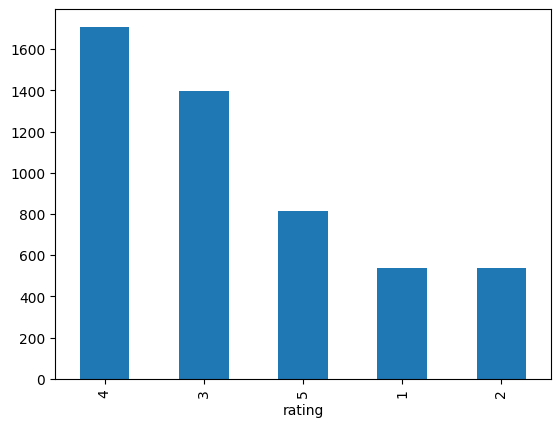

In [59]:
numerical_df['rating'].value_counts().plot(kind='bar')

<Axes: xlabel='rating', ylabel='count'>

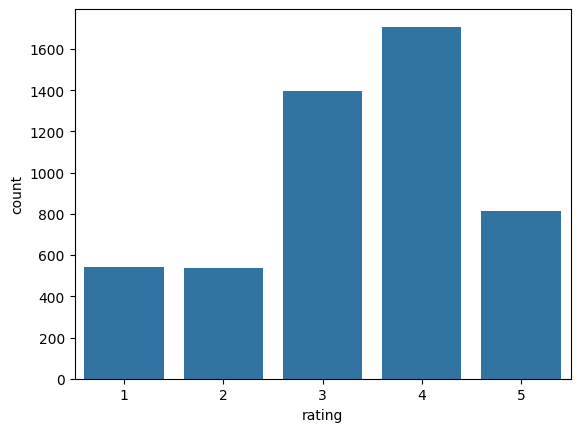

In [ ]:
sns.barplot(numerical_df['rating'].value_counts())

In [66]:
final_df['rating'] = final_df['rating'].astype('O')

<Axes: xlabel='feedback_category', ylabel='count'>

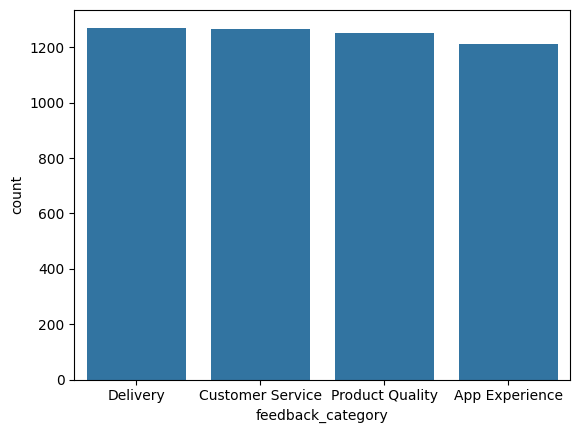

In [68]:
sns.barplot(categorical_df['feedback_category'].value_counts())

<Axes: xlabel='feedback_category', ylabel='count'>

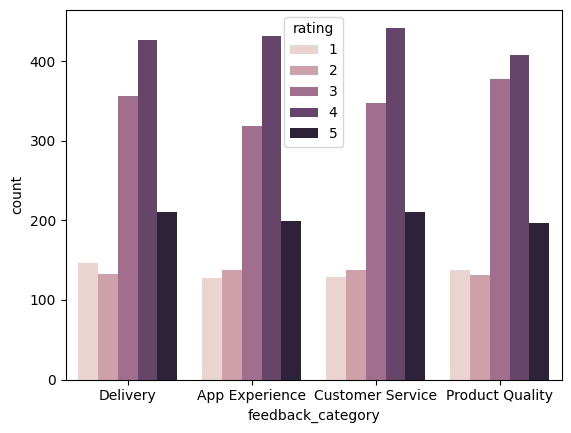

In [ ]:
sns.countplot(data=final_df, x='feedback_category',hue='rating')

<Axes: xlabel='order_date'>

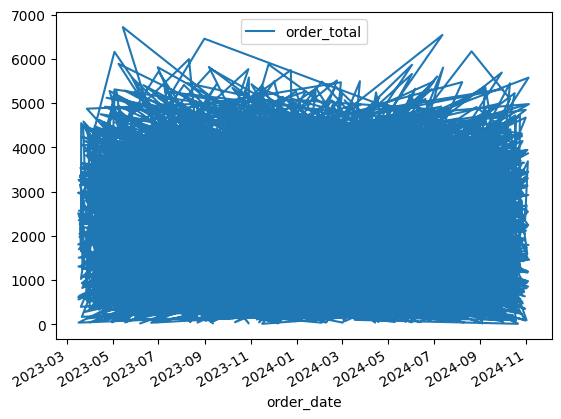

In [77]:
final_df[['order_date','order_total']].plot(x='order_date',y='order_total')

<Axes: xlabel='order_date'>

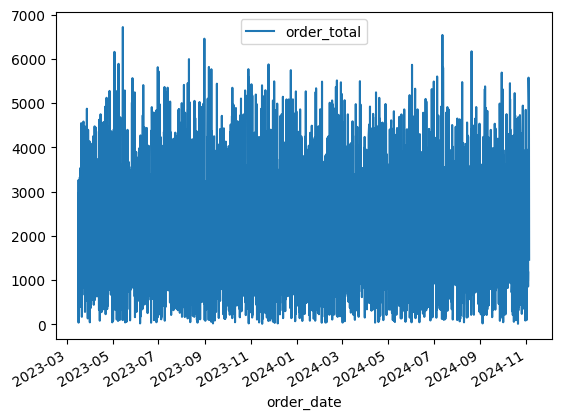

In [80]:
final_df[['order_date','order_total']].groupby(by='order_date').sum('order_total').plot()

In [81]:
final_df[['order_date','order_total']]

,order_date,order_total
0,2024-07-17 08:34:01,3197.07
1,2024-05-28 13:14:29,976.55
2,2024-09-23 13:07:12,839.05
3,2023-11-24 16:16:56,440.23
4,2023-11-20 05:00:39,2526.68
...,...,...
4995,2023-12-25 15:46:20,1132.33
4996,2023-11-27 09:18:43,2372.01
4997,2024-06-21 19:09:09,3158.35
4998,2024-06-06 14:58:13,1918.92


In [85]:
final_df['order_date'][0].month

7

In [87]:
final_df['order_month'] = final_df['order_date'].apply(lambda row: row.month)

In [89]:
final_df.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,order_month
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,7
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,5
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,9
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,11
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,11


In [93]:
monthly_sales = final_df[['order_month','order_total']].groupby(by='order_month').sum('order_total')

In [ ]:
monthly_sales.iloc[2:11]

,order_total
order_month,
3,816060.81
4,1093099.52
5,1182377.15
6,1044302.51
7,1140751.89
8,1169666.92
9,1089812.84
10,1116072.77
11,635941.39


In [ ]:
# final_df['order_date']

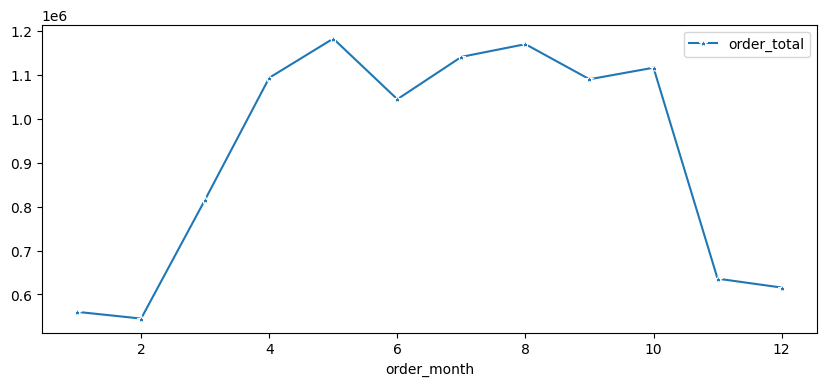

In [102]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4)) 
sns.lineplot(data=monthly_sales, markers='*')
plt.show()